 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whales = pd.read_csv("whale_returns.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [4]:
whales.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
# Count nulls
whales.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whales.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo = pd.read_csv("algo_returns.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [7]:
# Count nulls
algo.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
snp = pd.read_csv("sp_tsx_history.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [10]:
# Check Data Types
snp.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# Getting rid of $ and ,
snp['Close'] = snp['Close'].str.replace('$', '')
snp['Close'] = snp['Close'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [13]:
# Calculate Daily Returns In Percent Change
snp_returns = snp.pct_change()

In [14]:
# Drop nulls
whales.dropna(inplace=True)
algo.dropna(inplace=True)
snp_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
snp_returns.rename(columns={"Close": "S&P TSX 60"},inplace=True)

# Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_data = pd.concat([whales,algo,snp_returns], axis="columns", join="inner")
all_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

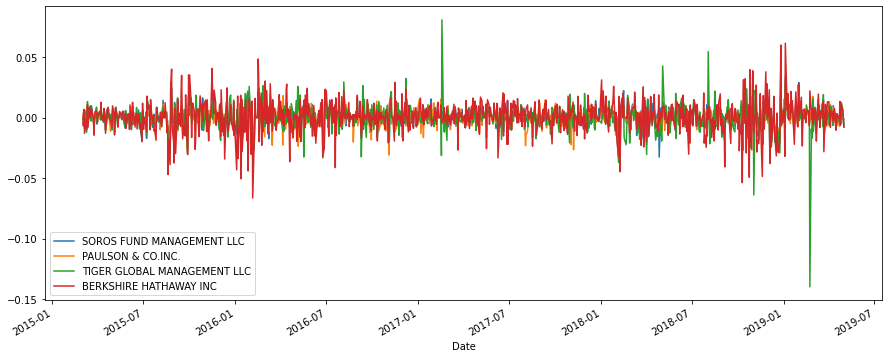

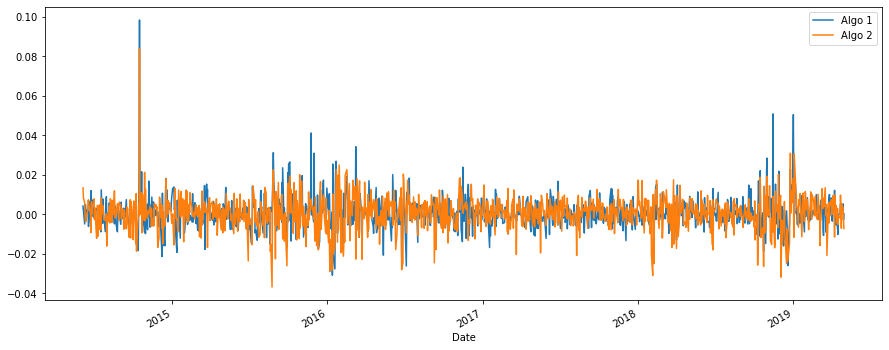

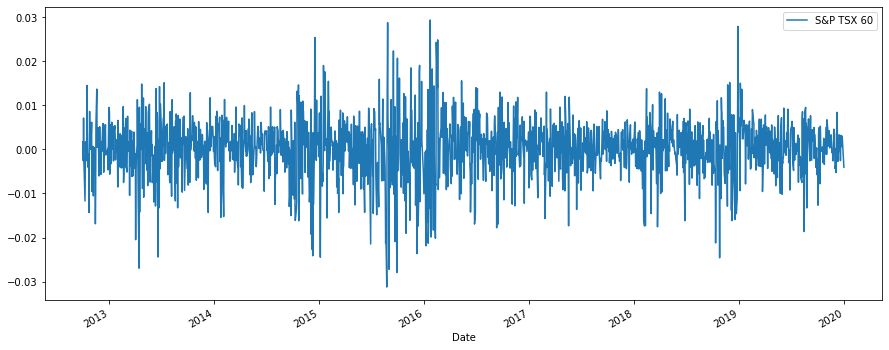

In [16]:
# Plot daily returns of all portfolios
whales.plot.line(figsize=(15,6))
algo.plot.line(figsize=(15,6))
snp_returns.plot.line(figsize=(15,6))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

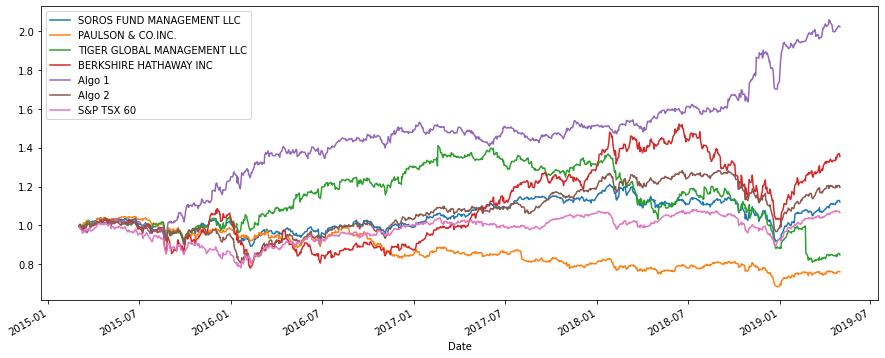

In [17]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + all_data).cumprod()
# Plot cumulative returns
cum_returns.plot(figsize=(15,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:xlabel='Date'>

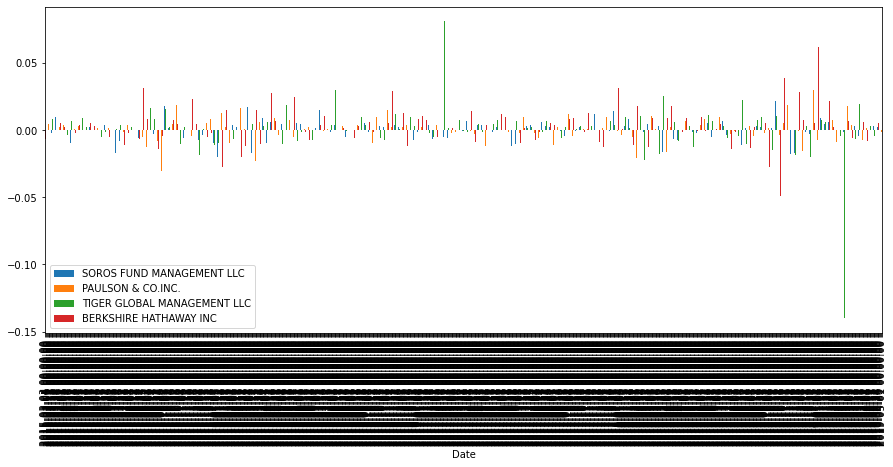

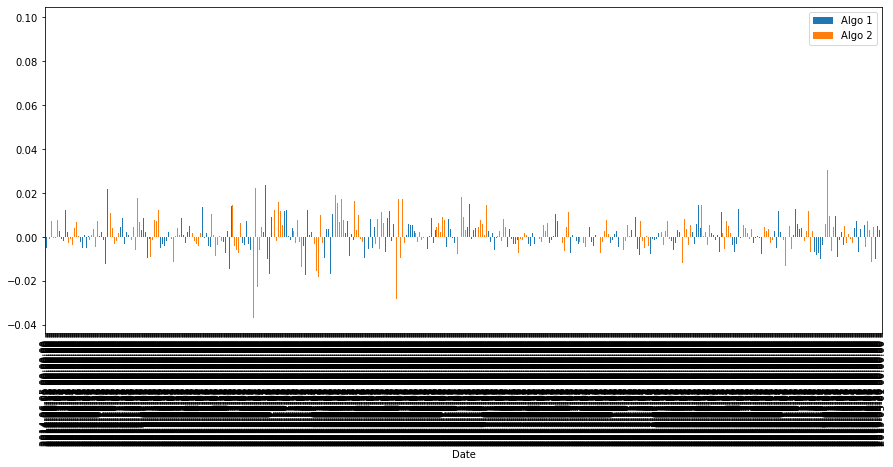

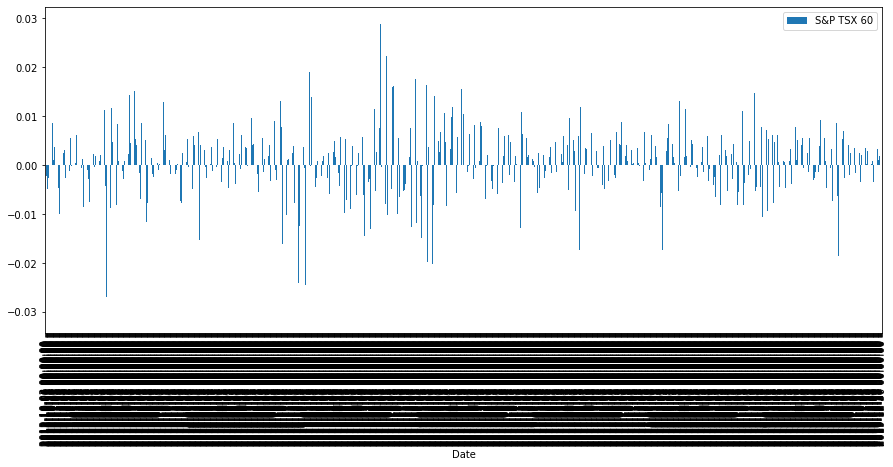

In [18]:
# Box plot to visually show risk
# Didn't plot all indivial portfolios seperate as I kept getting Key Error: PAULSON & CO.INC.
whales.plot(kind= "bar",figsize=(15,6))
algo.plot(kind="bar",figsize=(15,6))
snp_returns.plot(kind="bar",figsize=(15,6))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios using .std()
volatility = all_data.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
snp_std = all_data['S&P TSX 60'].std()
# Determine which portfolios are riskier than the S&P TSX 60
# creating two lists to hold if std higher or lower than S&P
less_risky = []
more_risky = []
# Iterating through list and appending based on std
for (columnName, columnData) in volatility.iteritems():
    if columnData < volatility['S&P TSX 60']:
        less_risky.append(columnData)
    elif columnData > volatility['S&P TSX 60']:
        more_risky.append(columnData)

In [21]:
# Iterating through list and printing statements about risk
for (columnName, columnData) in volatility.iteritems():
    if columnData == less_risky[0]:
        print(f" {columnName}is less risky than the S&P TSX 60 by {snp_std - less_risky[0]}%.")

 PAULSON & CO.INC. is less risky than the S&P TSX 60 by 5.184517368300636e-05%.


In [22]:
# Iterating through list and printing statements about risk
for (columnName, columnData) in volatility.iteritems():
    if columnData == more_risky[0]:
        print(f" {columnName} is more risky than the S&P TSX 60 by {snp_std - less_risky[0]}%.")
    elif columnData == more_risky[0]:
        print(f" {columnName} is more risky than the S&P TSX 60 by {more_risky[0] - snp_std}%.")
    elif columnData == more_risky[1]:
        print(f" {columnName} is more risky than the S&P TSX 60 by {more_risky[1] - snp_std}%.")
    elif columnData == more_risky[2]:
        print(f" {columnName} is more risky than the S&P TSX 60 by {more_risky[2] - snp_std}%.")
    elif columnData == more_risky[3]:
        print(f" {columnName} is more risky than the S&P TSX 60 by {more_risky[3] - snp_std}%.")
    elif columnData == more_risky[4]:
        print(f" {columnName} is more risky than the S&P TSX 60 by {more_risky[4] - snp_std}%.")

 SOROS FUND MANAGEMENT LLC is more risky than the S&P TSX 60 by 5.184517368300636e-05%.
 TIGER GLOBAL MANAGEMENT LLC is more risky than the S&P TSX 60 by 0.0038486179872417713%.
 BERKSHIRE HATHAWAY INC is more risky than the S&P TSX 60 by 0.005791348283085498%.
 Algo 1 is more risky than the S&P TSX 60 by 0.00055471524799359%.
 Algo 2 is more risky than the S&P TSX 60 by 0.0012921922441119765%.


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation by multiplying by the sqrt of the trading days(252 trading days)
import numpy as np
std_annualized = (volatility * np.sqrt(252))
std_annualized

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

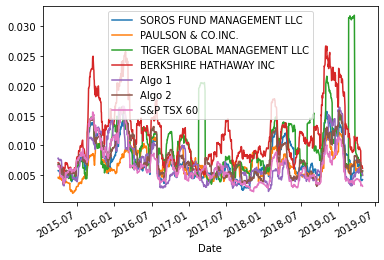

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_data.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = all_data.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

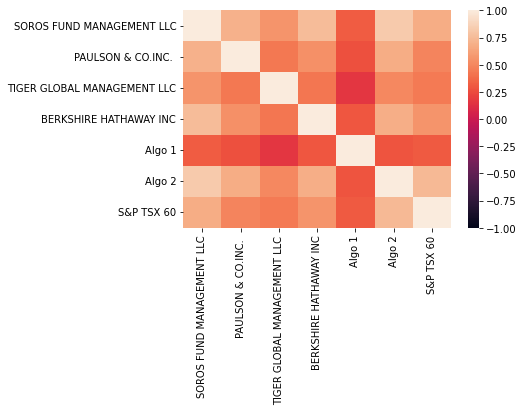

In [26]:
# Using a heat map to visulaize the correlation
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

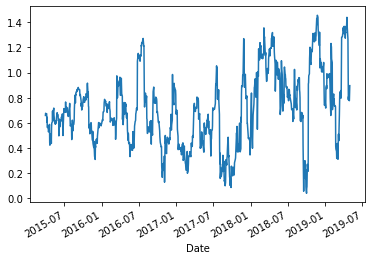

In [27]:
# Calculate covariance of a single portfolio
soros_cov = all_data['SOROS FUND MANAGEMENT LLC'].cov(all_data['S&P TSX 60'])
# Calculate variance of S&P TSX
snp_var = all_data['S&P TSX 60'].var()
# Computing beta
soros_beta = soros_cov / snp_var
# Plot beta trend
soros_rcov = all_data['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(all_data['S&P TSX 60'])
snp_rvar = all_data['S&P TSX 60'].rolling(window=21).var().dropna()
soros_beta = soros_rcov / snp_rvar
soros_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [28]:
# Use `ewm` to calculate the rolling window by using a 21 day half life
ewm = all_data.ewm(halflife=21, axis=0).std().dropna()

<AxesSubplot:xlabel='Date'>

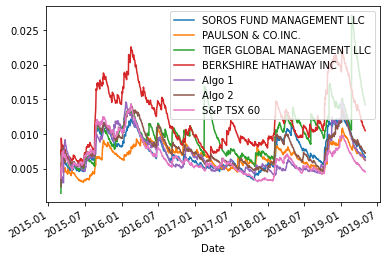

In [29]:
# Plotting the ewm std
ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
annualized = (all_data.mean() * 252) / (snp_std * np.sqrt(252))

<AxesSubplot:>

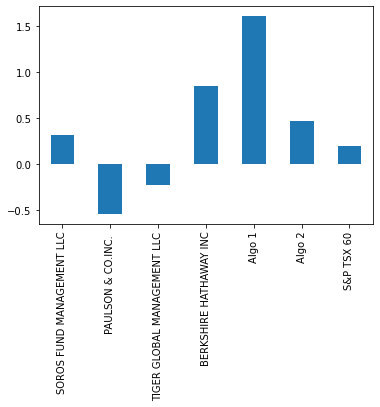

In [31]:
# Visualize the sharpe ratios as a bar plot
annualized.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [32]:
# Ranking all portfolio sharpe ratios from largest to smallest.
sharpe_rank = annualized.to_frame().rank(ascending=False)
sharpe_rank.rename(columns={0: "Sharpe Rankings"},inplace=True)

In [33]:
all_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [34]:
# Ranking sum of all portfolio returns ratios from largest to smallest.
# grabbing the last value of cum returns as it is total returns
total_returns = cum_returns.iloc[-1]
total_returns.rename('Returns Rankings', inplace=True)
total_returns_rank = total_returns.to_frame().rank(ascending=False)

In [35]:
# Ranking all portfolio STDs from largest to smallest.
annualized_std_rank = std_annualized.to_frame().rank(ascending=False)
annualized_std_rank.rename(columns={0: "STD Rankings"},inplace=True)

In [36]:
rankings = pd.concat([annualized_std_rank,total_returns_rank,sharpe_rank], axis="columns", join="inner")

In [37]:
rankings

,STD Rankings,Returns Rankings,Sharpe Rankings
SOROS FUND MANAGEMENT LLC,4.0,4.0,4.0
PAULSON & CO.INC.,7.0,7.0,7.0
TIGER GLOBAL MANAGEMENT LLC,2.0,6.0,6.0
BERKSHIRE HATHAWAY INC,1.0,2.0,2.0
Algo 1,5.0,1.0,1.0
Algo 2,3.0,3.0,3.0
S&P TSX 60,6.0,5.0,5.0


## Assesing Algo porfolios
As seen in the rankings above if you have the right algoroithmic trading portfolio it will do wonders. Algo 1 has the highest sharpe ratio of the bunch and the highest returns. Not only does it provide a solid return compared to risk, but also has a low standard deviation coming in at the third hightest. The most conservative portfolio is Paulson & Co but they also have the lowest reutns and sharpe ratio. For someone looking to invest in a non-retirement portfolio Algo 1 is definetly the way to go as it outperforms all whales portfolios in both returns and sharpe ratio without super high volatility. Algo 2 on the other hand is not worth investing in it has an average return, average sharpe ratio and high volatility. This said in general the algo portfolios did better than the whales and the S&P. Most whales portfolios also did better than the S&P. Overall Algo 1 is the best portfolio on this list all around and other portfolios simply do not provide the return to risk that Algo 1 offers.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock
goog = pd.read_csv("GOOG.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [39]:
# Reading data from 2nd stock
sq = pd.read_csv("SQ.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [40]:
# Reading data from 3rd stock
xom = pd.read_csv("XOM.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [41]:
# Reading data from 4th stock
jnj = pd.read_csv("JNJ.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [42]:
# Reading data from 5th stock
mu = pd.read_csv("MU.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)

In [43]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([sq,goog,xom,jnj,mu], axis="columns", join="inner")

In [44]:
# Reset Date index
my_stocks

,Close,Close,Close,Close,Close
Date,,,,,
2015-11-19,13.07,738.41,80.30,102.49,15.87
2015-11-20,12.85,756.60,79.79,102.48,15.43
2015-11-23,12.12,755.98,80.28,102.77,15.32
2015-11-24,12.02,748.28,81.88,102.04,15.63
2015-11-25,11.90,748.15,81.25,101.96,15.58
...,...,...,...,...,...
2021-05-13,197.13,2261.97,59.30,169.96,77.19
2021-05-14,207.85,2316.16,60.77,170.22,79.70
2021-05-17,202.92,2321.41,62.19,170.39,80.39


In [45]:
# Reorganize portfolio data by having a column per symbol
my_stocks.columns.values[0] = "SQ"
my_stocks.columns.values[1] = "GOOG"
my_stocks.columns.values[2] = "XOM"
my_stocks.columns.values[3] = "JNJ"
my_stocks.columns.values[4] = "MU"

In [46]:
# Calculate daily returns
my_returns = my_stocks.pct_change()
# Drop NAs
my_returns.dropna(inplace=True)
# Display sample data
my_returns.head()

,SQ,GOOG,XOM,JNJ,MU
Date,,,,,
2015-11-20,-0.016832,0.024634,-0.006351,-0.000098,-0.027725
2015-11-23,-0.056809,-0.000819,0.006141,0.002830,-0.007129
2015-11-24,-0.008251,-0.010185,0.019930,-0.007103,0.020235
2015-11-25,-0.009983,-0.000174,-0.007694,-0.000784,-0.003199
2015-11-27,0.012605,0.002820,-0.000246,0.004021,-0.001284


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
# Calculate portfolio return
weighted_returns = my_returns.dot(weights)
# Display sample data
weighted_returns.head()

Date
2015-11-20   -0.005274
2015-11-23   -0.011157
2015-11-24    0.002925
2015-11-25   -0.004367
2015-11-27    0.003583
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
returns_df = pd.concat([all_data,weighted_returns], axis="columns", join="inner")

In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_df.dropna(inplace=True)

In [50]:
# renaming column number 7 to My Portfolio
returns_df.columns.values[7] = "My Portfolio"

In [51]:
returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
Date,,,,,,,,
2015-11-20,0.005784,0.006760,0.003272,0.022681,-0.000583,0.000913,-0.002994,-0.005274
2015-11-23,-0.001089,-0.003781,0.003151,0.012117,0.012757,0.002214,-0.003805,-0.011157
2015-11-24,0.003382,0.006359,0.003376,-0.006365,0.041067,0.007598,0.001902,0.002925
2015-11-25,0.002190,0.004682,0.001628,0.000008,-0.000418,0.004740,-0.000329,-0.004367
2015-11-27,-0.000389,0.000004,0.001180,0.004219,0.001387,0.003810,-0.004242,0.003583
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003490
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.007836
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003663


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized std using 252 trading days
std_annualized2 = (returns_df.std() * np.sqrt(252))
std_annualized2

SOROS FUND MANAGEMENT LLC      0.123319
PAULSON & CO.INC.              0.113746
TIGER GLOBAL MANAGEMENT LLC    0.181265
BERKSHIRE HATHAWAY INC         0.203967
Algo 1                         0.118689
Algo 2                         0.130850
S&P TSX 60                     0.103730
My Portfolio                   0.209743
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

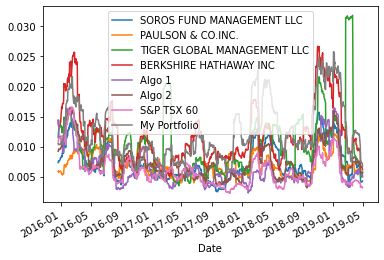

In [53]:
# Calculate rolling standard deviation using a rolling() with 21 day window
roll_std = returns_df.rolling(window=21).std()
# Plot rolling standard deviation
roll_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

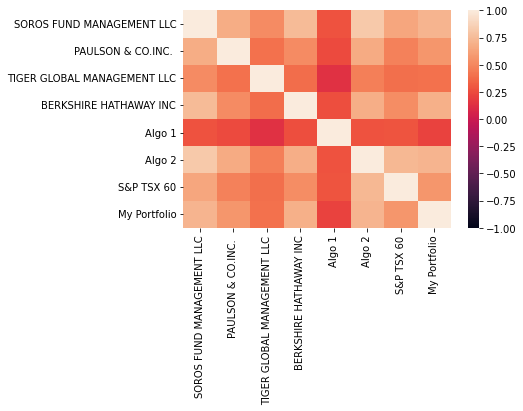

In [54]:
# Calculate and plot the correlation
corr = returns_df.corr()
sns.heatmap(corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

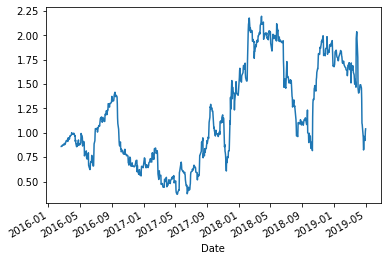

In [55]:
# Calculate and plot Beta
my_rcov = returns_df['My Portfolio'].rolling(window=60).cov(returns_df['S&P TSX 60'])
snp2_rvar = returns_df['S&P TSX 60'].rolling(window=60).var().dropna()
my_rbeta = my_rcov / snp2_rvar
my_rbeta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualized Sharpe Ratios
all_anaualized = (returns_df.mean() * 252) / (snp_std * np.sqrt(252))

<AxesSubplot:>

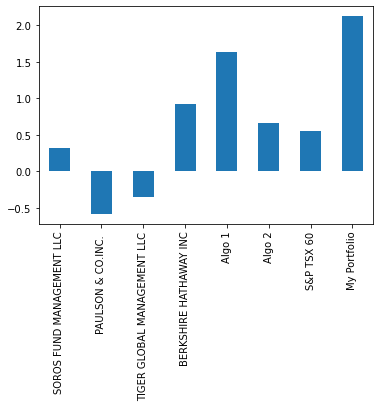

In [57]:
# Visualize the sharpe ratios as a bar plot
all_anaualized.plot(kind="bar")

In [58]:
# Cumulative Returns
my_cumulative_returns = (1 + returns_df).cumprod()

<AxesSubplot:xlabel='Date'>

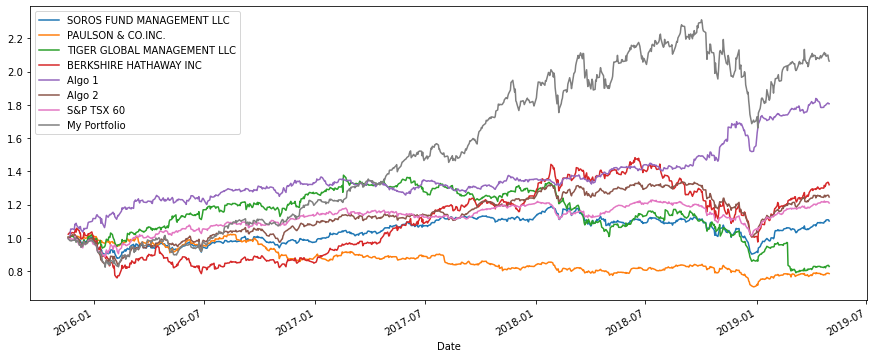

In [59]:
# Plotting Them
my_cumulative_returns.plot(figsize=(15,6))

<AxesSubplot:>

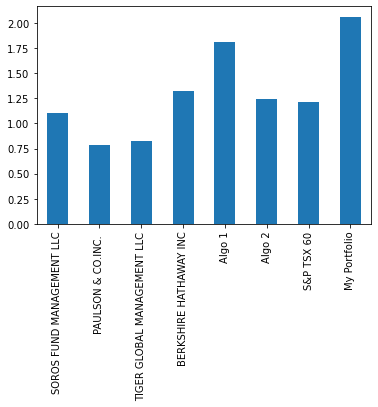

In [60]:
# Calculating total cumulative returns and plotting them
my_total_returns = my_cumulative_returns.iloc[-1]
my_total_returns.rename('Returns Rankings', inplace=True)
my_total_returns.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [61]:
# Ranking all portfolio sharpe ratios from largest to smallest.
sharpe_rankings = all_anaualized.to_frame().rank(ascending=False)
sharpe_rankings.rename(columns={0: "Sharpe Rankings"},inplace=True)

In [62]:
# Ranking sum of all portfolio returns ratios from largest to smallest.
my_total_returns_rank = my_total_returns.to_frame().rank(ascending=False)

In [63]:
# Ranking all portfolio STDs from largest to smallest.
annualized_std_rankings = std_annualized2.to_frame().rank(ascending=False)
annualized_std_rankings.rename(columns={0: "STD Rankings"},inplace=True)

In [64]:
# combining all rankings
all_rankings = pd.concat([annualized_std_rankings,my_total_returns_rank,sharpe_rankings], axis="columns", join="inner")

In [65]:
# viewing rankings - all rankings are in decending order (from highest to lowest)
all_rankings

,STD Rankings,Returns Rankings,Sharpe Rankings
SOROS FUND MANAGEMENT LLC,5.0,6.0,6.0
PAULSON & CO.INC.,7.0,8.0,8.0
TIGER GLOBAL MANAGEMENT LLC,3.0,7.0,7.0
BERKSHIRE HATHAWAY INC,2.0,3.0,3.0
Algo 1,6.0,2.0,2.0
Algo 2,4.0,4.0,4.0
S&P TSX 60,8.0,5.0,5.0
My Portfolio,1.0,1.0,1.0


In [66]:
# creating two lists for more returns or less returns than the S&P
less_return = []
more_return = []
# iterating through a df and appending values based on if they are higher or lower than the S&P
for (columnName, columnData) in my_total_returns.iteritems():
    if columnData < my_total_returns['S&P TSX 60']:
        less_return.append(columnData)
    elif columnData > my_total_returns['S&P TSX 60']:
        more_return.append(columnData)

In [67]:
# Printing statements about return compared to S&P
print("_________________________")
print("Less Profitable Companies")
print("_________________________")
for (columnName, columnData) in my_total_returns.iteritems():
    if columnData == less_return[0]:
        print(f" {columnName}is less profitable than the S&P TSX 60 by {(less_return[0]- my_total_returns['S&P TSX 60']) * 100}%.")
    elif columnData == less_return[1]:
        print(f" {columnName}is less profitable than the S&P TSX 60 by {(less_return[0]- my_total_returns['S&P TSX 60']) * 100}%.")
print("_________________________")
print("More Profitable Companies")
print("_________________________")
for (columnName, columnData) in my_total_returns.iteritems():
    if columnData == more_return[0]:
        print(f" {columnName}is more profitable than the S&P by {(more_return[0] - my_total_returns['S&P TSX 60']) * 100}%.")
    elif columnData == more_return[1]:
        print(f" {columnName}is more profitable than the S&P by {(more_return[1] - my_total_returns['S&P TSX 60']) * 100}%.")
    elif columnData == more_return[2]:
        print(f" {columnName}is more profitable than the S&P by {(more_return[2] - my_total_returns['S&P TSX 60']) * 100}%.")
    elif columnData == more_return[3]:
        print(f" {columnName}is more profitable than the S&P by {(more_return[3] - my_total_returns['S&P TSX 60']) * 100}%.")

_________________________
Less Profitable Companies
_________________________
 SOROS FUND MANAGEMENT LLCis less profitable than the S&P TSX 60 by -10.811922547914477%.
 PAULSON & CO.INC. is less profitable than the S&P TSX 60 by -10.811922547914477%.
_________________________
More Profitable Companies
_________________________
 BERKSHIRE HATHAWAY INCis more profitable than the S&P by 10.997060258166268%.
 Algo 1is more profitable than the S&P by 59.671535612746915%.
 Algo 2is more profitable than the S&P by 3.6315419646850478%.
 My Portfoliois more profitable than the S&P by 85.29099403320468%.


## Assesing all porfolios
As you can see from the chart above My Portfolio is highest in STD, Returns and Sharpe Ratio. A high STD is not ideal for every investor especailly for those who know then cannot endure large fluctuations in their portfolio or are investing for a retirement fund. This said if a person is able to withstand the high volatility in their portfolio their returns and sharpe ratio will be quite high in comparison to other large firms and Algo 2. If one can not withstand high volatiliy a good option is algo 1 which has the 6th highest volatility (very low) and the second best return. My portfolio does provide impressive returns coming in at 85% higher than the S&P TSX 60, with Algo 1 25% behind at 60%. All other portolios ranged from 10% higher to 10% lower than the S&P TSX 60. Overall if you are only looking for returns and good sharpe ratio my porfolio is the portfolio for you, but if you want a better all around portfolio algo 1 will do the trick as it less volatile and overall less risky.